Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.6914234892573257
R²: 0.2889587014843801


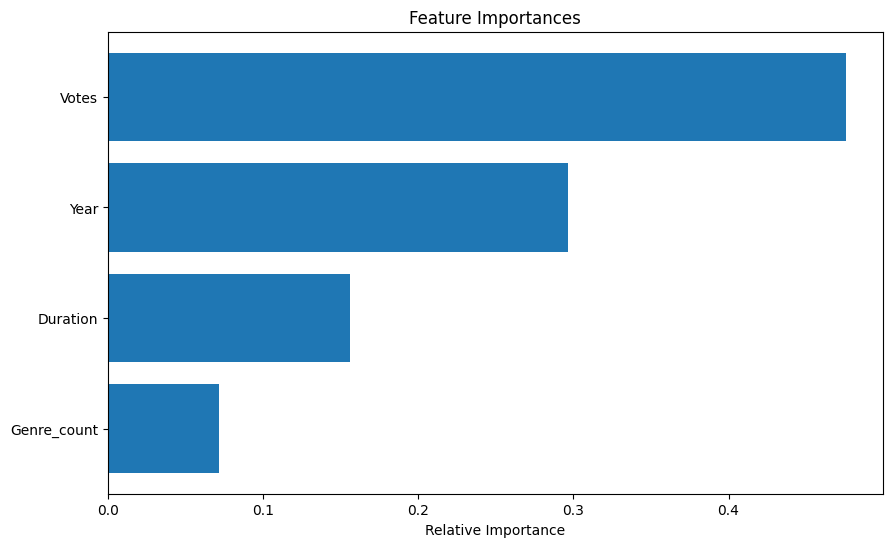

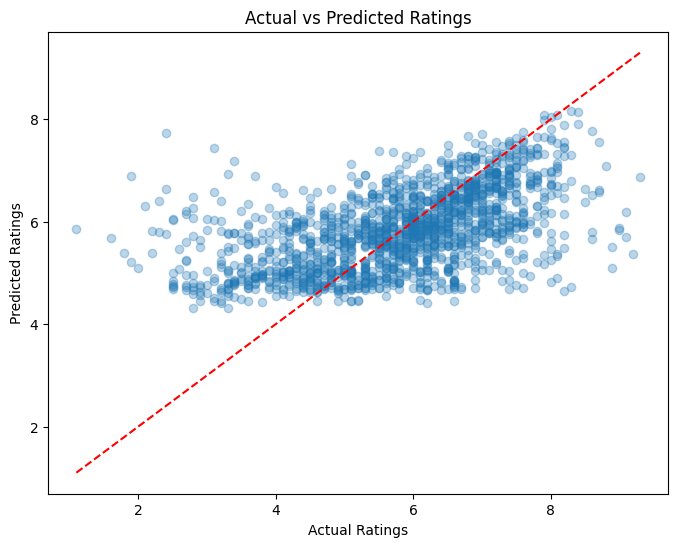

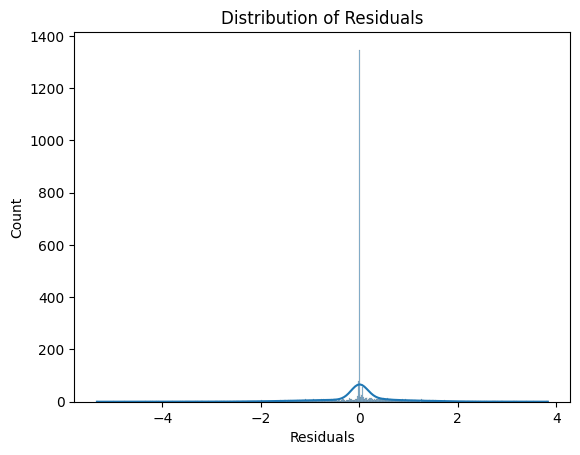

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Clean the Votes column
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Convert 'Duration' column to numerical values
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

# Convert 'Year' column to numeric values
df['Year'] = df['Year'].str.extract('(\d{4})').astype(float)

# Handle missing values for 'Rating', 'Votes', 'Duration', and 'Year' columns
imputer = SimpleImputer(strategy='median')
df[['Rating', 'Votes', 'Duration', 'Year']] = imputer.fit_transform(df[['Rating', 'Votes', 'Duration', 'Year']])

# Feature Engineering (e.g., counting number of genres)
df['Genre_count'] = df['Genre'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Define feature set and target variable
X = df[['Duration', 'Genre_count', 'Votes', 'Year']]
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline and hyperparameter tuning
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {np.mean((y_pred - y_test)**2)}")

print('R²:', r2_score(y_test, y_pred))

# Visualization
# Feature Importance
# Assuming `best_model` is a fitted RandomForestRegressor model
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Predictions vs Actual Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


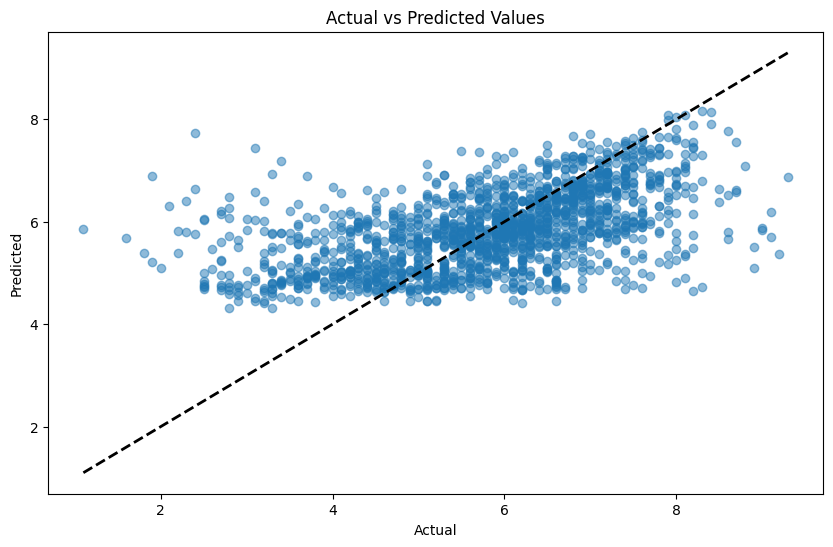

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()


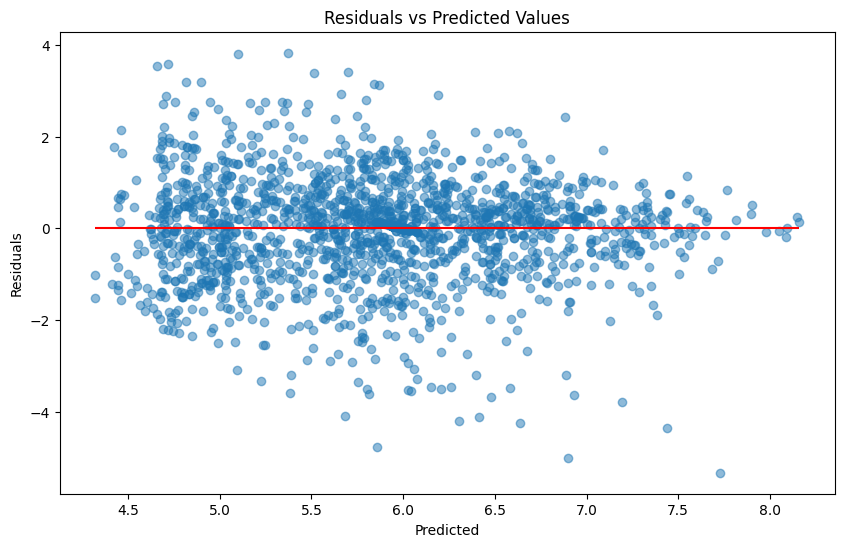

In [31]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
